# Sales Forecasting using Advanced Models

- In this project, we will be using sales data from an online retail store to forecast future sales using advanced models like LSTM and CNN-LSTM.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
# Load the dataset
df = pd.read_excel('online_retail_II.xlsx')

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Convert the date column to a datetime object and set it as the index
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.set_index('InvoiceDate')

In [6]:
# Extract the total sales for each day
df['TotalSales'] = df['Quantity'] * df['Price']
daily_sales = df.groupby(pd.Grouper(freq='D')).sum()['TotalSales'].reset_index()

In [7]:
# Split the data into training and testing sets
train = daily_sales[:-90]
test = daily_sales[-90:]

In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train['TotalSales'].values.reshape(-1, 1))

In [9]:
# Define the number of time steps and features
n_steps = 30
n_features = 1

# Convert the data into a format suitable for training an LSTM model
X_train, y_train = [], []
for i in range(n_steps, len(train_scaled)):
    X_train.append(train_scaled[i-n_steps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

In [10]:
# Build an LSTM model
model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
8/8 [==============================] - 4s 44ms/step - loss: 0.1470
Epoch 2/100
8/8 [==============================] - 0s 43ms/step - loss: 0.0440
Epoch 3/100
8/8 [==============================] - 0s 46ms/step - loss: 0.0263
Epoch 4/100
8/8 [==============================] - 0s 38ms/step - loss: 0.0255
Epoch 5/100
8/8 [==============================] - 0s 44ms/step - loss: 0.0214
Epoch 6/100
8/8 [==============================] - 0s 39ms/step - loss: 0.0218
Epoch 7/100
8/8 [==============================] - 0s 43ms/step - loss: 0.0219
Epoch 8/100
8/8 [==============================] - 0s 42ms/step - loss: 0.0215
Epoch 9/100
8/8 [==============================] - 0s 47ms/step - loss: 0.0216
Epoch 10/100
8/8 [==============================] - 0s 38ms/step - loss: 0.0215
Epoch 11/100
8/8 [==============================] - 0s 39ms/step - loss: 0.0215
Epoch 12/100
8/8 [==============================] - 0s 43ms/step - loss: 0.0216
Epoch 13/100
8/8 [==============================]

In [12]:
# Make predictions on the test data
test_scaled = scaler.transform(test['TotalSales'].values.reshape(-1, 1))
X_test, y_test = [], []
for i in range(n_steps, len(test_scaled)):
    X_test.append(test_scaled[i-n_steps:i, 0])
    y_test.append(test_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test)

In [13]:
# Calculate the root mean squared error (RMSE)
rmse = sqrt(mean_squared_error(test_scaled[n_steps:], y_pred))
rmse

0.311160860408379

In [14]:
y_pred = scaler.inverse_transform(y_pred)

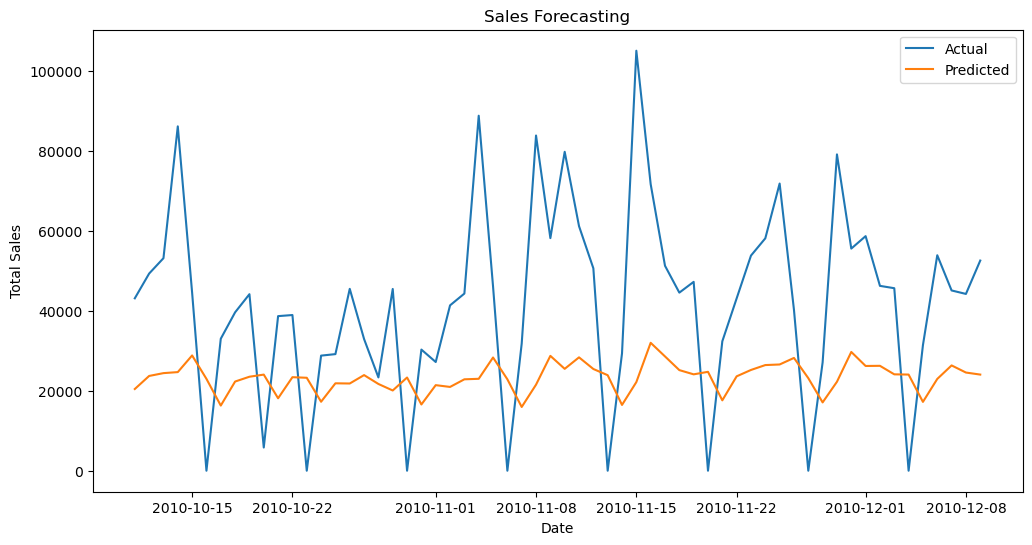

In [15]:
# Plot the predicted sales against the actual sales
plt.figure(figsize=(12, 6))
plt.plot(test['InvoiceDate'][n_steps:], test['TotalSales'][n_steps:], label='Actual')
plt.plot(test['InvoiceDate'][n_steps:], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Forecasting')
plt.legend()
plt.show()

In [16]:
# Build a CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPool1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(LSTM(units=128, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
8/8 [==============================] - 4s 23ms/step - loss: 0.1415
Epoch 2/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0351
Epoch 3/100
8/8 [==============================] - 0s 25ms/step - loss: 0.0289
Epoch 4/100
8/8 [==============================] - 0s 24ms/step - loss: 0.0262
Epoch 5/100
8/8 [==============================] - 0s 25ms/step - loss: 0.0227
Epoch 6/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0218
Epoch 7/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0213
Epoch 8/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0214
Epoch 9/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0214
Epoch 10/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0215
Epoch 11/100
8/8 [==============================] - 0s 25ms/step - loss: 0.0218
Epoch 12/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0214
Epoch 13/100
8/8 [==============================]

In [18]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test)

In [19]:
# Calculate the root mean squared error (RMSE)
rmse = sqrt(mean_squared_error(test_scaled[n_steps:], y_pred))
rmse

0.27493608455638785

In [20]:
y_pred = scaler.inverse_transform(y_pred)

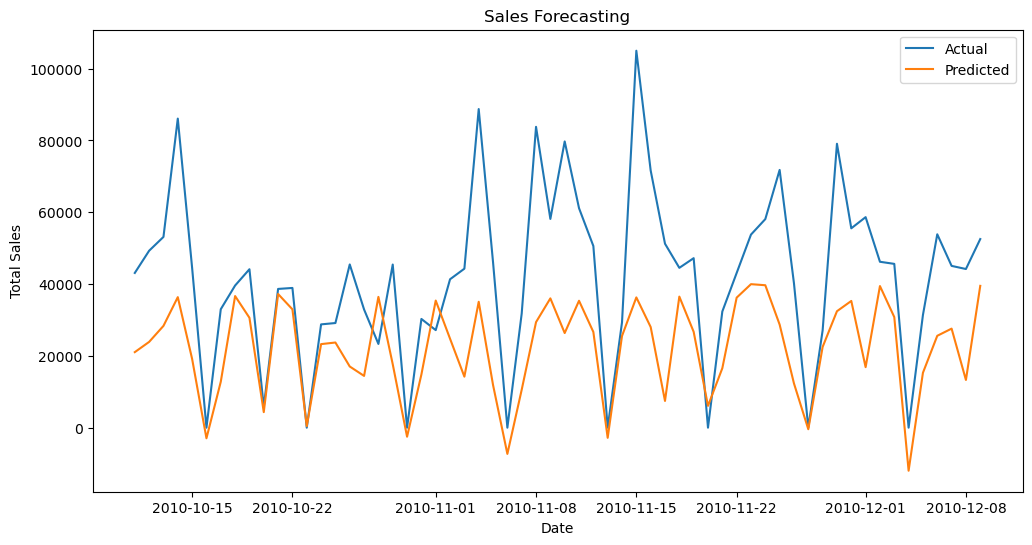

In [21]:
# Plot the predicted sales against the actual sales
plt.figure(figsize=(12, 6))
plt.plot(test['InvoiceDate'][n_steps:], test['TotalSales'][n_steps:], label='Actual')
plt.plot(test['InvoiceDate'][n_steps:], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Forecasting')
plt.legend()
plt.show()